# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Вероятность. 

* [<font color="blue"><i>Легкая часть</i></font>](attachment:./#<font-color="blue"><i>Легкая-часть</i></font>)
    * [Задача 1.](attachment:./#Задача-1.)
        * [Часть 1.](attachment:./#Часть-1.)
        * [Часть 2.](attachment:./#Часть-2.)
        * [Часть 3.](attachment:./#Часть-3.)
    * [Задача 2.](attachment:./#Задача-2.)
* [<font color="orange"><i>Сложная часть</i></font>](attachment:./#<font-color="orange"><i>Сложная-часть</i></font>)
    * [Задача 3.](attachment:./#Задача-3.)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
colors = sns.color_palette('tab10', as_cmap=False)
sns.set()
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.
#### Часть 1.
Условие задачи в контесте, ссылка на который отправлена через бот.

Продублируйте сюда написанный код и постройте требуемые графики.

In [3]:
coin = sps.bernoulli(p=0.5).rvs
uniform_pdf = sps.uniform.pdf
norm_pdf = sps.norm.pdf
expon_pdf = sps.expon.pdf


def uniform(size=1, precision=30):
    shape = np.prod(size), precision
    data = coin(shape)
    return (np.tensordot(data, 2. ** np.arange(-precision, 0), axes=([1], [0]))).reshape(size)

Протестируем и убедимся в том, что реализованная функция обрабатывает кортежи:

In [4]:
uniform(size=(1, 2, 3), precision=324)

array([[[0.95618672, 0.66274348, 0.17400457],
        [0.17657616, 0.87225971, 0.68489133]]])

Рассмотрим связь значения и плотности случайной величины:

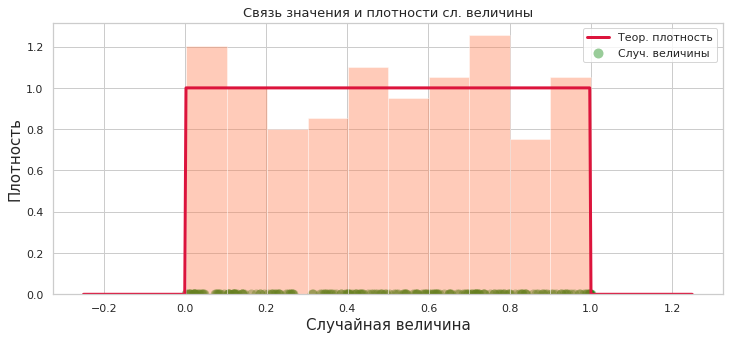

In [7]:
def plot_uniform_density(size=200):
    linspace = np.linspace(-0.25, 1.25, 500)
    sample = uniform(size, precision=50)

    plt.figure(figsize=(12, 5))
    sns.set(style='whitegrid')
    plt.scatter(x=sample, y=np.zeros(size), s=100, linewidth=0, alpha=0.4, color='green', label='Случ. величины')
    plt.hist(sample, density=True, bins=10, alpha=0.4, color='coral')
    plt.plot(linspace, uniform_pdf(linspace), linewidth=3.0, color='crimson', label='Теор. плотность')
    
    plt.legend()
    plt.xlabel('Случайная величина', fontsize=15)
    plt.ylabel('Плотность', fontsize=15)
    plt.title('Связь значения и плотности сл. величины', fontsize=13)
    return plt.gcf()


pl = plot_uniform_density()

Заметим, что интеграл красной теор.плостности визуально равен 1, как и требует мат.база.  
Исследуем значения случайных величин в зависимости от параметра precision:

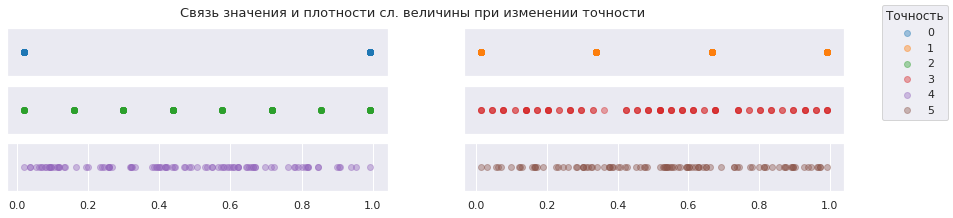

In [9]:
def plot_uniform_different_precision(size=100):
    fig = plt.figure(figsize=(15, 3))
    sns.set(style='darkgrid')
    for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
        plt.subplot(3, 2, i + 1)
        plt.scatter(
            uniform(size, precision),
            np.zeros(size),
            alpha=0.4,
            color=colors[i],
            label='{}'.format(i),
        )
        # plt.xlabel('Значение', fontsize=10)
        # plt.ylabel('Плотность', fontsize=10)
        plt.yticks([])
        if i < 4:
            plt.xticks([])
    fig.legend(title='Точность')
    plt.suptitle('Связь значения и плотности сл. величины при изменении точности', fontsize=13)
    return plt.gcf()


pl = plot_uniform_different_precision()

**Вывод**  
По построению, рассматриваемое распределение является дискретным, а не непрерывным.

Рассмотрим область значений $\xi$. Согласно теории, которая подтверждена графиками выше, минимум всегда равен нулю, вне зависимости от точности, когда как максимум огранчен сверху $$\sum_{i = 1}^{n} \frac{1}{2^i}.$$

Заметим, что чем меньше параметр $n$, тем больше возможных значений покрывает выборка.

#### Часть 2.

Напишем генерацию нормального распределения, пользуясь преобразованиями Бокса-Мюллера. Построим соответствующий график.


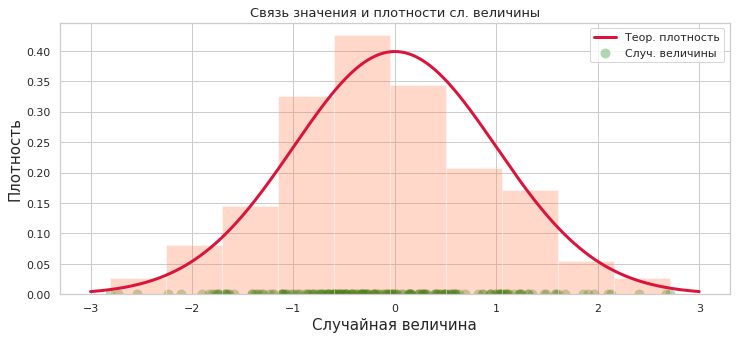

In [10]:
def normal(size=1, loc=0, scale=1, precision=30):
    return np.cos(2.0 * np.pi * scale * uniform(size, precision) + loc) \
            * np.sqrt(-2.0 * np.log(uniform(size, precision)))

def plot_normal_density(size=200):
    grid = np.linspace(-3, 3, 500)
    sample = normal(size, precision=30)
    sns.set(style='whitegrid')
    plt.figure(figsize=(12, 5))

    plt.scatter(x=sample, y=np.zeros(size), s=100, linewidth=0, alpha=0.3, color='green', label='Случ. величины')
    plt.hist(sample, density=True, bins=10, alpha=0.3, color='coral')
    plt.plot(grid, norm_pdf(grid), linewidth=3.0, color='crimson', label='Теор. плотность')

    plt.legend()
    plt.xlabel('Случайная величина', fontsize=15)
    plt.ylabel('Плотность', fontsize=15)
    plt.title('Связь значения и плотности сл. величины', fontsize=13)
    return plt.gcf()


pl = plot_normal_density()

#### Часть 3.
Вы уже научились генерировать выборку из равномерного распределения. Напишите функцию генерации выборки из экспоненциального распределения, используя из теории вероятностей:

*Если $\xi \; -$  случайная величина, имеющая абсолютно непрерывное распределение, и $F -$  ее функция распределения, то случайная величина $F(\xi)$ имеет равномерное распределение на $[0, 1]$*.

Какое преобразование над равномерной случайной величиной необходимо совершить?

**Решение:**  
Воспользуемся обратным преобразованием: $F(x) = 1-e^{\lambda \cdot x}$. Найдем обратную:  
$$H(x) = F^{-1}(x) = -\frac{1}{\lambda}\ln(1 - x).$$

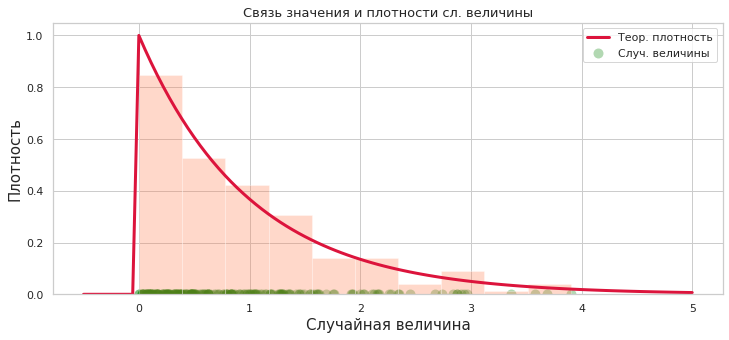

In [11]:
def expon(size=1, lambd=1, precision=30):
    return (-lambd ** -1) * np.log(uniform(size, precision))


def plot_expon_density(size=200):
    grid = np.linspace(-0.5, 5, 100)
    sample = expon(size, precision=30)

    plt.figure(figsize=(12, 5))

    plt.scatter(x=sample, y=np.zeros(size), s=100, linewidth=0, alpha=0.3, color='green', label='Случ. величины')
    plt.hist(sample, density=True, bins=10, alpha=0.3, color='coral')
    plt.plot(grid, expon_pdf(grid), linewidth=3.0, color='crimson', label='Теор. плотность')

    plt.legend()
    plt.xlabel('Случайная величина', fontsize=15)
    plt.ylabel('Плотность', fontsize=15)
    plt.title('Связь значения и плотности сл. величины', fontsize=13)
    return plt.gcf()

pl = plot_expon_density()

**Вывод**  
В ходе выполнения задачи, мы получили абсолютно непрерывные распределения из дискретного распределения Бернулли. В первой части задания мы рассмотрели влияния точности представления действительного числа на генерируемые величины, что полезно учитывать, когда речь идёт о представлении чисел для реальных исследований.

Во второй и третьей частях мы генерировали распределения, пользуясь фактом из теории вероятности: зная функцию распределения какого-то определенного распределения, мы можем получать из него другие. В качестве методов мы пользовались преобразованием Брюса-Миллера и методом обратных преобразований.

### Задача 2.

Рассмотрим распределение Коши с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими тяжелыми хвостами. Иначе говоря, плотность убывает медленно при $x \to \infty$. Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

Text(0.5, 1.0, 'Связь значения и плотности сл. величины')

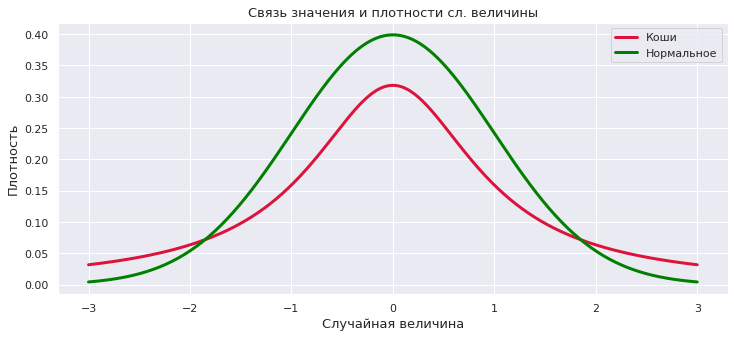

In [12]:
import matplotlib.pyplot as plt

sns.set(style='darkgrid')
linspace = np.linspace(-3, 3, 300)
sample = sps.cauchy.pdf(linspace)

plt.figure(figsize=(12, 5))

plt.plot(linspace, sps.cauchy.pdf(linspace), linewidth=3.0, color='crimson', label='Коши')
plt.plot(linspace, sps.norm.pdf(linspace), linewidth=3.0, color='green', label='Нормальное')

plt.legend()
plt.xlabel('Случайная величина', fontsize=13)
plt.ylabel('Плотность', fontsize=13)
plt.title('Связь значения и плотности сл. величины', fontsize=13)

**Вывод**  
Когда речь идёт о случайных величинах, значение которых лежит в небольшой окрестности нуля, плотность их нормального распределения всегда выше, нежели чем распределения Коши. Наоборот, если по модулю случайная величина существенно больше нуля, плотность распределения Коши будет выше.

**2.** Повторите эксперимент с <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/lec4_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

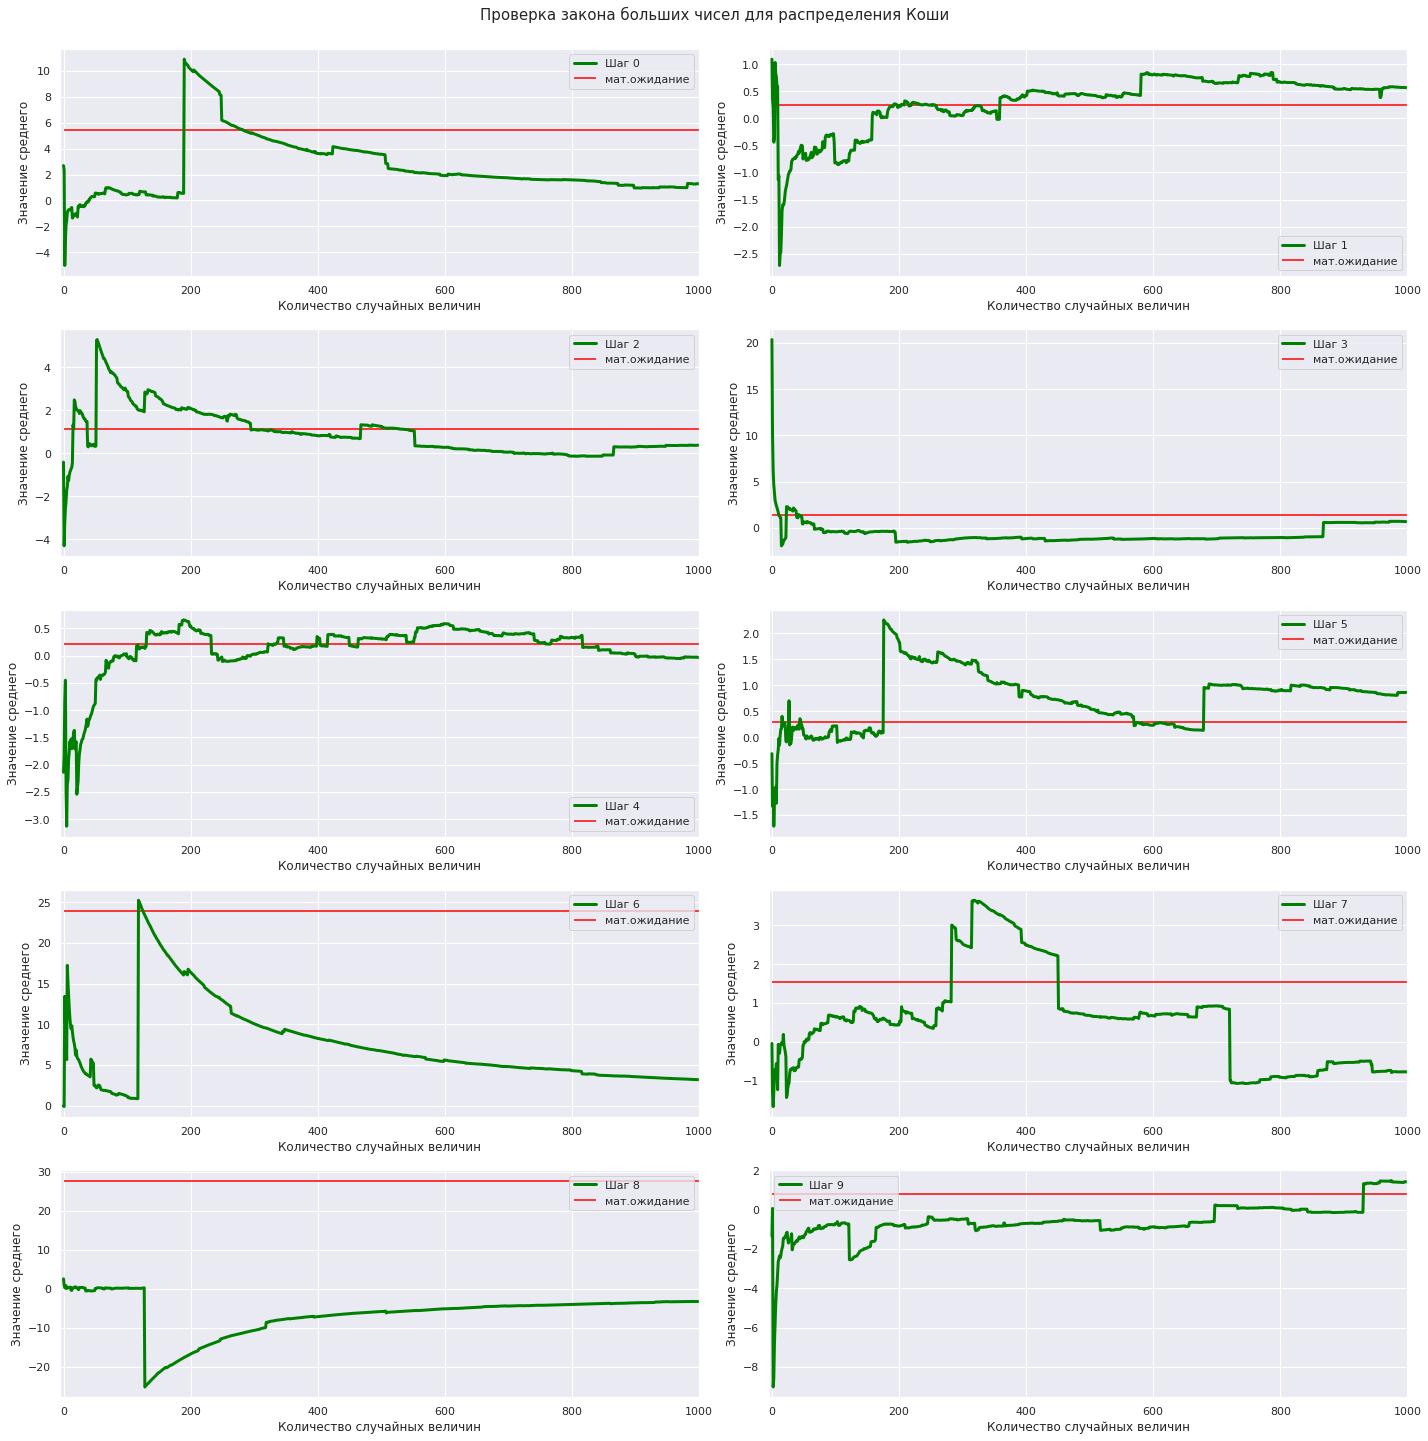

In [13]:
size = 1000  # количество случайных величин
fig = plt.figure(figsize=(20, 20))
plt.title('Проверка закона больших чисел')

# эксперименты
for i in range(10):
    # Генерация выборки и вычисление средних
    samples = sps.cauchy.rvs(size=size)
    cum_means = samples.cumsum() / (np.arange(size) + 1)
    # График
    plt.subplot(5, 2, i + 1)
    plt.plot(cum_means, lw=3, label='Шаг {}'.format(i), color='green')
    plt.hlines(np.var(cum_means, ddof=1), 0, size, alpha=1, color='red', label='мат.ожидание')
    plt.legend()
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение среднего')
    plt.xlim((-5, size))

plt.suptitle('Проверка закона больших чисел для распределения Коши', y=1, fontsize=15)
plt.tight_layout()

Сгенерируем большое количество независимых наборов величин и изобразим на одном графике:

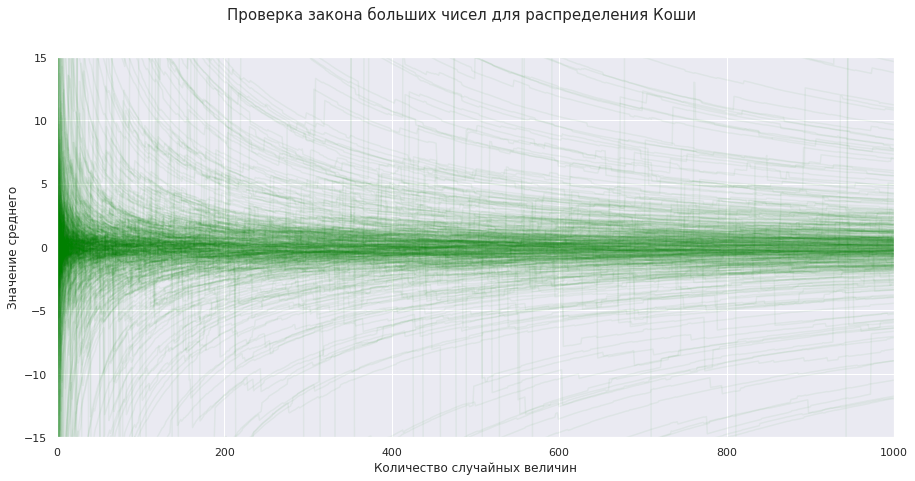

In [14]:
samples_count = 500
# Генерация выборки и вычисление средних
samples = sps.cauchy.rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

# График
plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color='green', alpha=0.05)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.suptitle('Проверка закона больших чисел для распределения Коши', fontsize=15)
plt.xlim((0, size))
a = 15
plt.ylim((-a, a))
plt.show()

**Вывод**  
Закон больших чисел гласит, что наблюдаемое среднее значение выборки из большой выборки будет близко к истинному среднему значению по совокупности и что оно будет тем ближе, чем больше выборка. Но поскольку у распределения Коши не определено математическое ожидание, то и закон к нему неприменим.

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

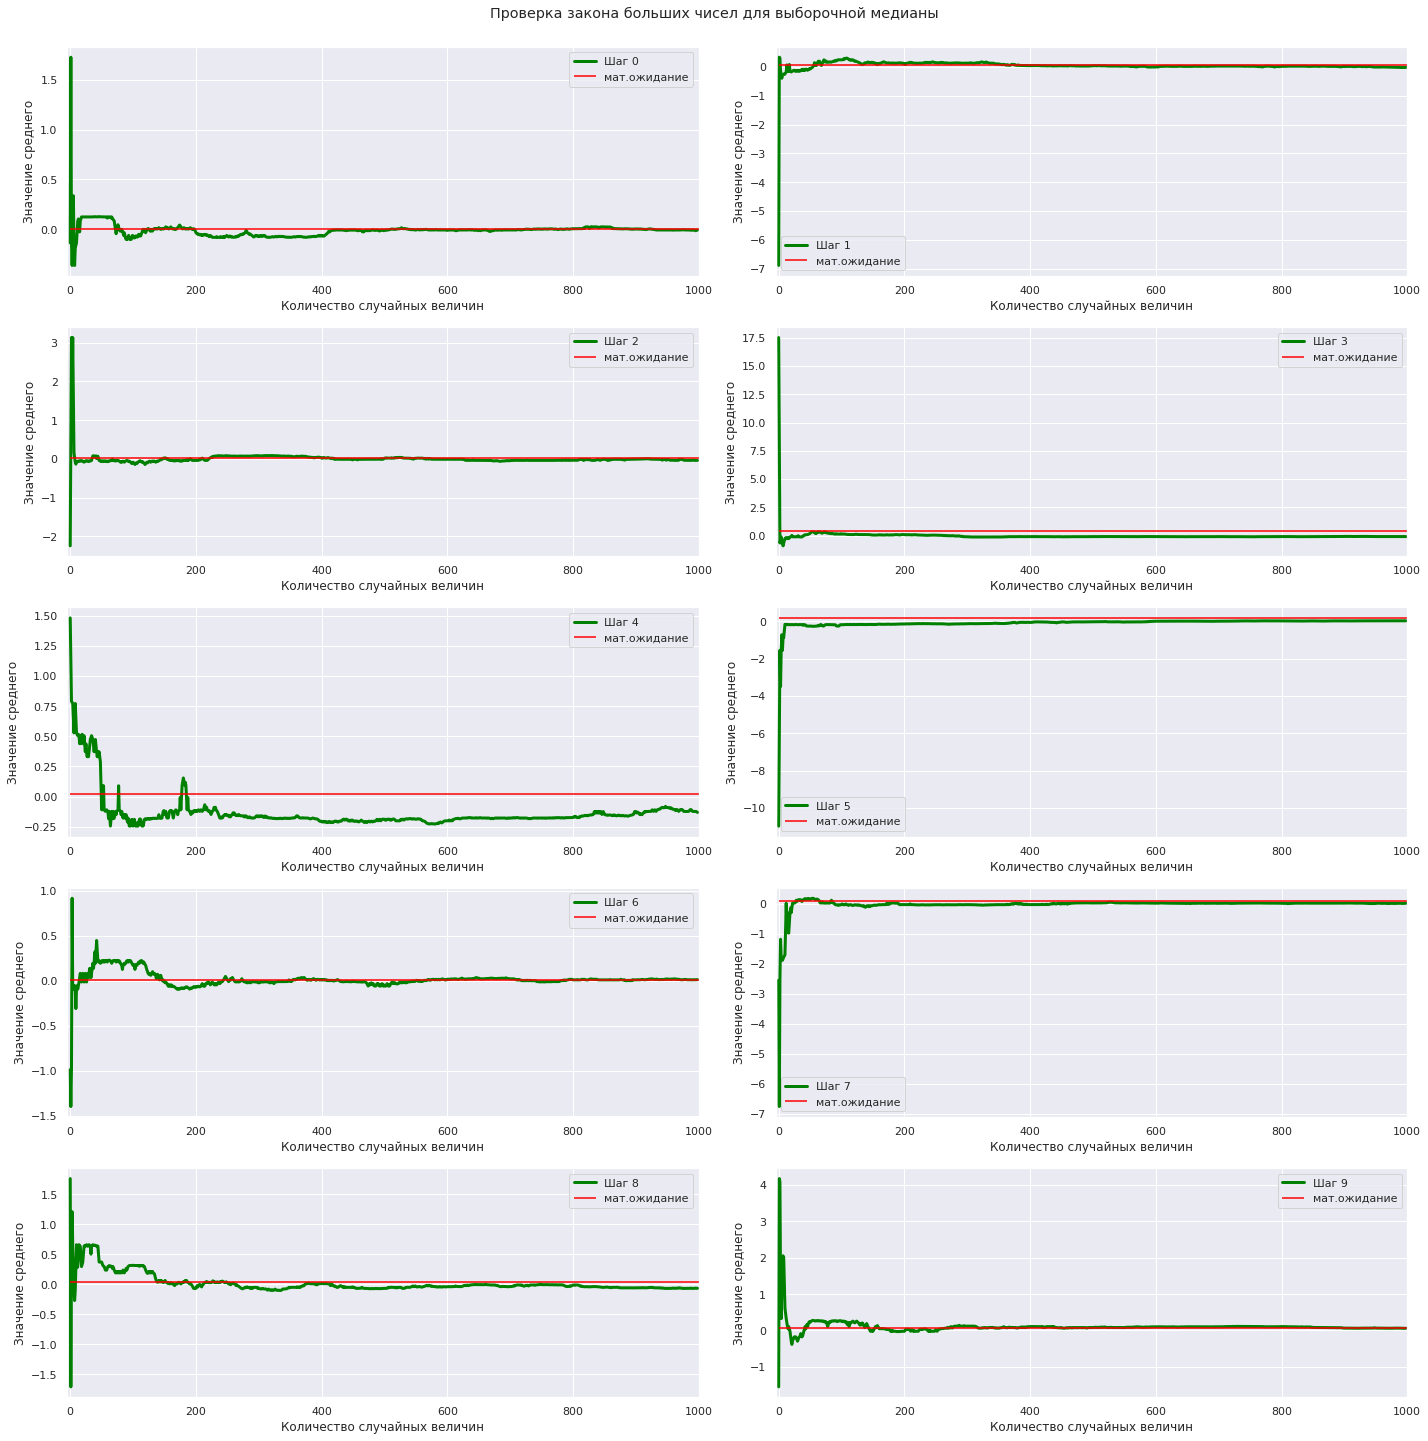

In [94]:
size = 1000  # количество случайных величин
plt.figure(figsize=(20, 20))

# эксперименты
for i in range(10):
    # Генерация выборки и вычисление средних
    samples = sps.cauchy.rvs(size=size)
    cum_median = [np.median(samples[:i + 1]) for i in range(len(samples) - 1)]
    # График
    plt.subplot(5, 2, i + 1)
    plt.plot(cum_median, lw=3, label='Шаг {}'.format(i), color='green')
    plt.hlines(np.var(cum_median, ddof=1), 0, size, alpha=1, color='red', label='мат.ожидание')
    plt.legend()
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение среднего')
    plt.xlim((-5, size))
plt.suptitle('Проверка закона больших чисел для выборочной медианы', y=1)
plt.tight_layout()

Сгенерируем большое количество независимых наборов величин и изобразим на одном графике:

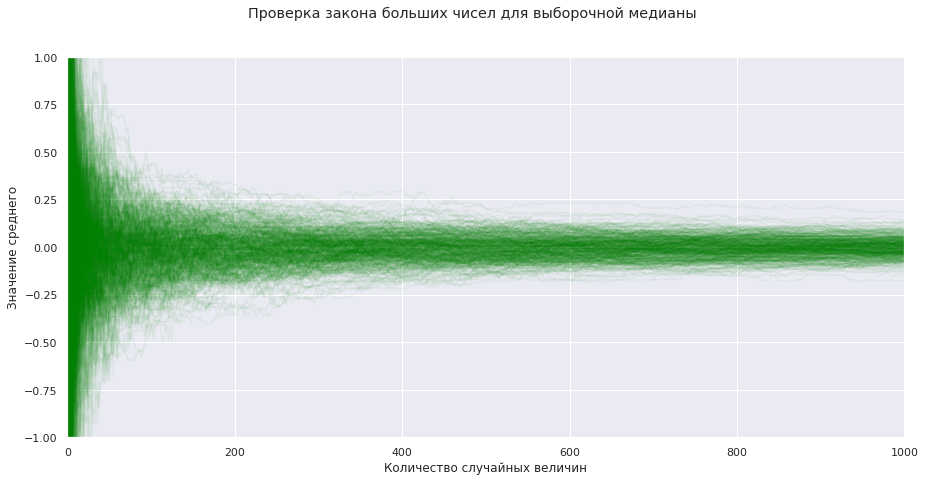

In [35]:
samples_count = 500
samples = sps.cauchy.rvs(size=(samples_count, size))

def get_med(array):
    return [np.median(array[:j+1]) for j in range(len(array))]

cum_median = [get_med(samples[i]) for i in range(len(samples))]

plt.figure(figsize=(15, 7))
for i in range(samples_count - 1):
    plt.plot(np.arange(size) + 1, cum_median[i], color='green', alpha=0.05)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size))
plt.suptitle('Проверка закона больших чисел для выборочной медианы')
a = 1
plt.ylim((-a, a))
plt.show()

**Вывод**  
Таким образом, выборочная медиана подчиняется ЗБЧ, в отличие от распределения Коши. Факт подтверждается наличием математического ожидания у выборочной медианы и графиками выше: "зелёный" сходится к "красной" прямой математического ожидания.

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/lec4_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.
_____
**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах.

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

Text(0.5, 1.0, 'Зависимость $F(n)$ от $n$ в обычном масштабе')

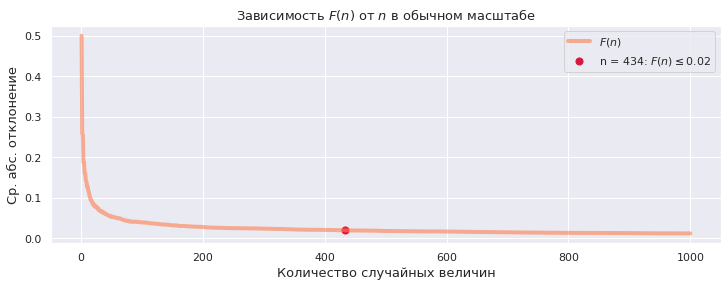

In [2]:
# задаём необходимые константы
size = 1000
samples_count = 500
err = 0.02
a = 0.5
# генерируем выборку
samples = sps.bernoulli(p=a).rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)
# берём наименьший индекс
mean_dev = np.mean(np.abs(cum_means - a), axis=0)
min_n = np.where(mean_dev < err)[0][0]

plt.figure(figsize=(12, 4))

plt.plot(np.arange(size) + 1, mean_dev, lw=4, color='coral', alpha=0.6, label='$F(n)$')
plt.scatter(min_n,
            mean_dev[min_n], marker='.', s=200, color='crimson', label='n = {}: $F(n) \leq {}$'.format(min_n, err))

plt.legend()
plt.xlabel('Количество случайных величин', fontsize=13)
plt.ylabel('Ср. абc. отклонение', fontsize=13)
plt.title('Зависимость $F(n)$ от $n$ в обычном масштабе', fontsize=13)

Text(0.5, 1.0, 'Зависимость $F(n)$ от $n$ в логарифмическом масштабе по одной оси')

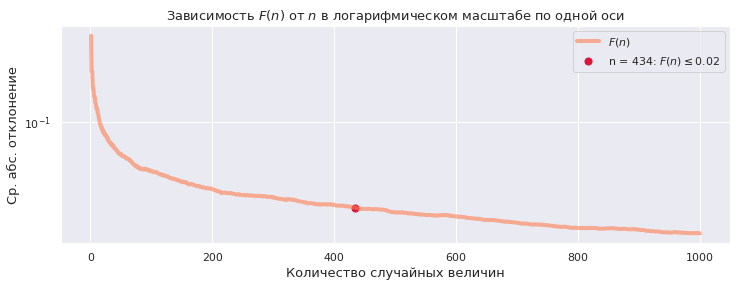

In [7]:
plt.figure(figsize=(12, 4))
plt.plot(np.arange(size) + 1, mean_dev, lw=4, color='coral', alpha=0.6, label='$F(n)$')
plt.scatter(min_n,
            mean_dev[min_n], marker='.', s=200, color='crimson', label='n = {}: $F(n) \leq {}$'.format(min_n, err))

plt.yscale('log')
plt.xlabel('Количество случайных величин', fontsize=13)
plt.ylabel('Ср. абc. отклонение', fontsize=13)
plt.legend()
plt.title('Зависимость $F(n)$ от $n$ в логарифмическом масштабе по одной оси', fontsize=13)

Наиболее наглядной зависимость выглядит в случае, когда мы строим логарифмическую зависимость по двум осям:

Text(0.5, 1.0, 'Зависимость $F(n)$ от $n$ в логарифмическом масштабе по двум осям')

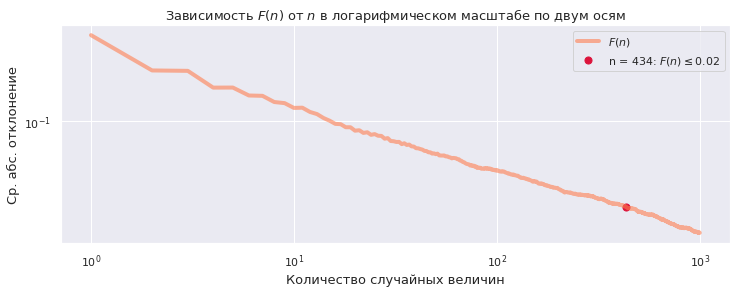

In [6]:
plt.figure(figsize=(12, 4))
plt.plot(np.arange(size) + 1, mean_dev, lw=4, color='coral', alpha=0.6, label='$F(n)$')
plt.scatter(min_n,
            mean_dev[min_n], marker='.', s=200, color='crimson', label='n = {}: $F(n) \leq {}$'.format(min_n, err))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Количество случайных величин', fontsize=13)
plt.ylabel('Ср. абc. отклонение', fontsize=13)
plt.legend()
plt.title('Зависимость $F(n)$ от $n$ в логарифмическом масштабе по двум осям', fontsize=13)

Таким образом, можно наблюдать линейную зависимость в логарифмическом масштабе и, соответственно, степенную в привычном.

**Вывод**  
Таким образом, в нашем эксперименте достаточно собрать $395-405$ объектов.   
Согласно первому графику, может создаться впечатление, что при увеличении количества случайных величин, отклонение перестаёт уменьшаться. Таким образом, в ряде случаев полезно логарифмировать значения или брать логарифмический масштаб оси. Мы научились определять достаточное $n$ для успешного эксперимента.  


**2.** Повторите данный эксперимент для значений $a$ от $0.05$ до $0.95$ с шагом $0.05$. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$. При реализации можно сделать цикл по значениям $a$.

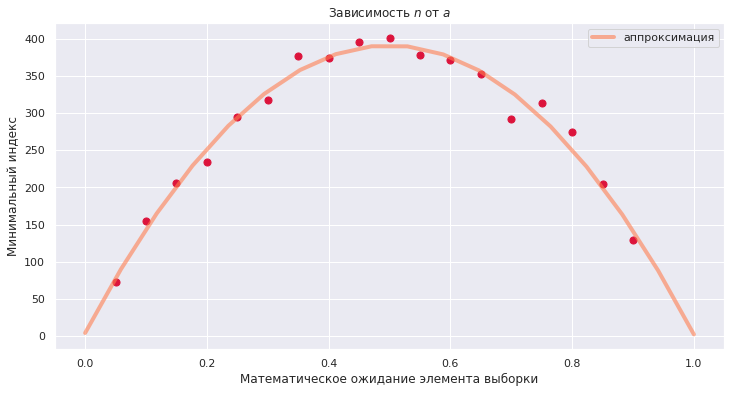

In [93]:
import scipy.optimize as opt

# генерируем выборку
samples = sps.bernoulli(p=0.5).rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

# генерируем массив минимальных значений
ans = []
arange = np.arange(0.05, 0.95, 0.05)
for a in arange:
    samples = sps.bernoulli(p=a).rvs(size=(samples_count, size))
    cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)
    mean_dev = np.mean(np.abs(cum_means - a), axis=0)
    min_n = np.where(mean_dev < err)[0][0]
    ans.append(min_n)


# аппроксимируем
def mapping(x, a, b, c):
    return a * x ** 2 + b * x + c


popt, _ = opt.curve_fit(mapping, arange, ans)
y = popt[0] * x ** 2 + popt[1] * x + popt[2]

plt.figure(figsize=(12, 6))
plt.plot(x, y, lw=4, color='coral', alpha=0.6, label = 'аппроксимация')
plt.scatter(x=arange, y=ans, marker='.', s=200, color='crimson')
plt.legend()
plt.xlabel('Математическое ожидание элемента выборки')
plt.ylabel('Минимальный индекс')
plt.title('Зависимость $n$ от $a$')

**Вывод**  
Последний график позволяет увидеть характер зависимости минимального количества элементов от матожидания. Одно из моих предположений состоит в том, что мы можем приблизить данное поведение параболической зависимостью. Коэффициенты можно было подобрать вручную, но для наилучшей иллюстрации я подключила один из модулей для аппроксимации.

**Пик достигается в середине, так как это наименее предсказуемое распределение. Так как исходное распределение симметрично, то и итоговый график симметричен относительно прямой $x=0.5$. Искомый график является частной демонстрацией неравенства Рао-Крамера.**